In [26]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# ml libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('Data_sets/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [28]:
df.shape

(200, 6)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [30]:
df['Drug'].value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [31]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'categorical':
        df[col] = le.fit_transform(df[col])


In [32]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [33]:
df['Cholesterol'].value_counts()

Cholesterol
0    103
1     97
Name: count, dtype: int64

In [34]:
X = df.drop('Drug',axis = 1)
y = df['Drug']

In [35]:
X_train,X_test,y_train,y_test  =train_test_split(X,y,test_size=0.2,random_state=42)

model = DecisionTreeClassifier(criterion='entropy',max_depth=4)

model.fit(X_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [36]:
y_pred = model.predict(X_test)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [38]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

1.0


In [40]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# 6. Export Graphviz tree
dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=X.columns,
    class_names=[str(c) for c in model.classes_],  # Convert to string
    filled=True,
    rounded=True,
    special_characters=True
)


# 7. Graph banakar show karo
graph = graphviz.Source(dot_data)
graph.render("drug_tree")   # Save as PDF/PNG (drug_tree.pdf banega)
graph.view()     

'drug_tree.pdf'

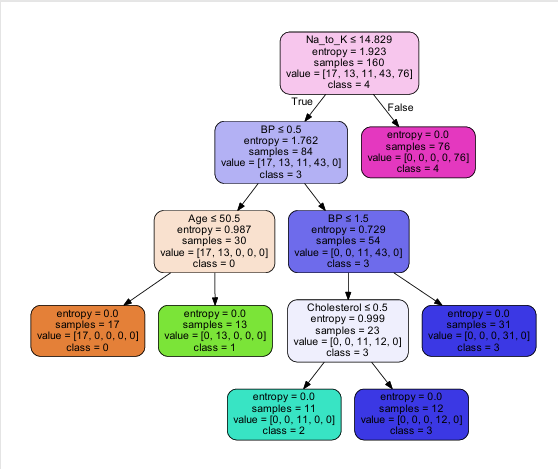

# Decision Tree Explanation (Drug200 Dataset)

### Root Node
- **Feature:** Na_to_K (Sodium-to-Potassium ratio)  
- **Condition:** `Na_to_K ≤ 14.829`  
- **Entropy:** 1.923 (high → very mixed dataset)  
- **Samples:** 160  
- **Split:**  
  - Left branch → True (Na_to_K ≤ 14.829)  
  - Right branch → False (Na_to_K > 14.829)  

---

### Right Branch (Na_to_K > 14.829)
- **Entropy = 0.0** (pure node)  
- **Samples = 76**  
- **Class = DrugY**  
➡️ This means: for patients with Na_to_K > 14.829, the model always predicts **DrugY**.  

---

### Left Branch (Na_to_K ≤ 14.829)
- **Next split on:** Blood Pressure (BP ≤ 0.5)  
- **Samples = 84**  
- **Value = [17,13,11,43,0]** (distribution of classes)  

---

#### Left of BP ≤ 0.5
- **Next split on:** Age ≤ 50.5  
- **Samples = 30**  
- If Age ≤ 50.5:  
  - Class mostly **DrugA**  
- If Age > 50.5:  
  - Class mostly **DrugB**  

---

#### Right of BP ≤ 0.5
- **Next split on:** BP ≤ 1.5  
- **Samples = 54**  
- If BP ≤ 1.5:  
  - Next split → Cholesterol ≤ 0.5  
  - If Cholesterol ≤ 0.5 → Class = **DrugC**  
  - If Cholesterol > 0.5 → Class = **DrugX**  
- If BP > 1.5:  
  - Class = **DrugX**  

---

# Summary
1. **Na_to_K** is the most important feature. If it’s high, patients are prescribed **DrugY** directly.  
2. If Na_to_K is low, the model looks at **Blood Pressure** and then **Age**.  
3. **Cholesterol** is used further down to separate DrugC vs DrugX.  
4. Each **leaf node** represents one specific drug (DrugA, DrugB, DrugC, DrugX, DrugY).  
